---

## **Mini projeto** | Análise Exploratória de Dados com SQL (Aws: Athena e S3) ##

Atividade prática de **fixação**<br>

Linkedin [Walisson Carvalho](https://www.linkedin.com/in/wacarv-/)<br>
Kaggle [Projeto](https://www.kaggle.com/code/walissoncarvalho/notebookda834403c1)


---

## Tópicos ##
*   Extração dos dados
*   Entendimento e explicação das colunas
*   Análise Exploratória

---
  




### Extração dos dados ###

A base de dados explorada foi extraída do link abaixo:

https://github.com/andre-marcos-perez/ebac-course-utils/blob/main/dataset/credito.xlsx


---

### Entendimento e explicação das colunas ###

Ao analisar o dataset foi possível notar que existem 13 colunas, listadas abaixo: <br>

  * idade = idade do cliente

  * sexo = sexo do cliente (F ou M)

  * dependentes = número de dependentes do cliente

  * escolaridade = nível de escolaridade do clientes

  * estado_civil = estado civil dos clientes

  * salario_anual = faixa salarial do cliente

  * tipo_cartao = tipo de cartao do cliente

  * qtde_produtos = quantidade de produtos comprados nos últimos 12 meses

  * iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses

  * meses_inativo_12m = quantidade de meses que o cliente ficou inativo

  * limite_credito = limite de credito do cliente

  * valor_transacoes_12m = valor das transações dos ultimos 12 meses

  * qtde_transacoes_12m = quantidade de transacoes dos ultimos 12 meses

  ---


### Análise exploratória ###

A tabela "credito" foi criada no Aws Athena com o código a seguir:

```sql
CREATE EXTERNAL TABLE IF NOT EXISTS `default`.`credito` (
  `idade` INT,
  `sexo` STRING,
  `dependentes` INT,
  `escolaridade` STRING,
  `estado_civil` STRING,
  `salario_anual` STRING,
  `tipo_cartao` STRING,
  `qtde_produtos` BIGINT,
  `iteracoes_12m` INT,
  `meses_inativo_12m` INT,
  `limite_credito` FLOAT,
  `valor_transacoes_12m` FLOAT,
  `qtde_transacoes_12m` INT
)
ROW FORMAT DELIMITED
FIELDS TERMINATED BY ','
STORED AS TEXTFILE
LOCATION 's3://eda-credito-sql/'
TBLPROPERTIES ('skip.header.line.count'='1');



Verificando os tipos de dados das colunas

```sql
DESCRIBE credito
```

Resultado da query:

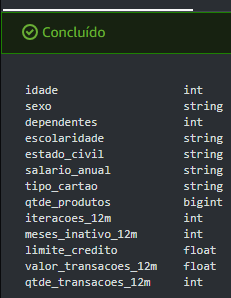

Verificando a quantidade total de dados da base
```sql
SELECT count(*) FROM credito
```
Resultado da query:


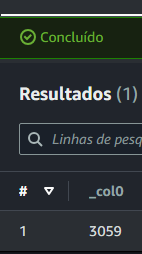


**Comentário**: Foi verificado que existem 3059 linhas da tabela "credito"

---

Verificando os valores únicos das colunas com os tipos de dados "String".




## **Escolaridade** ##

```sql
SELECT DISTINCT escolaridade FROM credito
```

Resultado da Query:

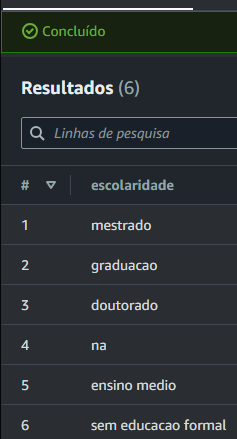


## **Estado Civil** ##

```sql
SELECT DISTINCT estado_civil FROM credito
```

Resultado da query:


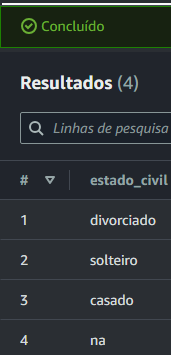

## **Salário Anual** ##

```sql
SELECT DISTINCT salario_anual FROM credito
```

Resultado da Query:

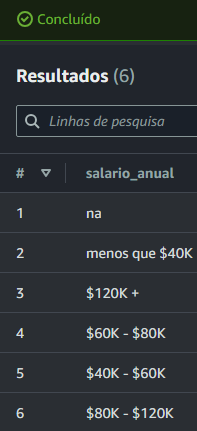

## **Escolaridade** ##

```sql
SELECT DISTINCT tipo_cartao FROM credito
```

Resultado da Query:


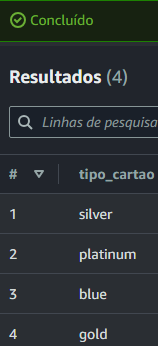

**Comentário**: Existem valores nulos nas colunas: "escolaridade, estado_civil e salario_anual", é um ponto de atenção, pois caso seja feita alguma análise estatísticas com essas colunas, esses valores precisam ser tratados de alguma forma.

Perguntas:

1° Qual o salário anual agrupado por sexo?

Query:

```sql
SELECT sexo,
       salario_anual,
       COUNT(*) AS quantidade
FROM credito
WHERE salario_anual NOT IN ('na')
GROUP BY sexo, salario_anual;
```

Resultado da Query:
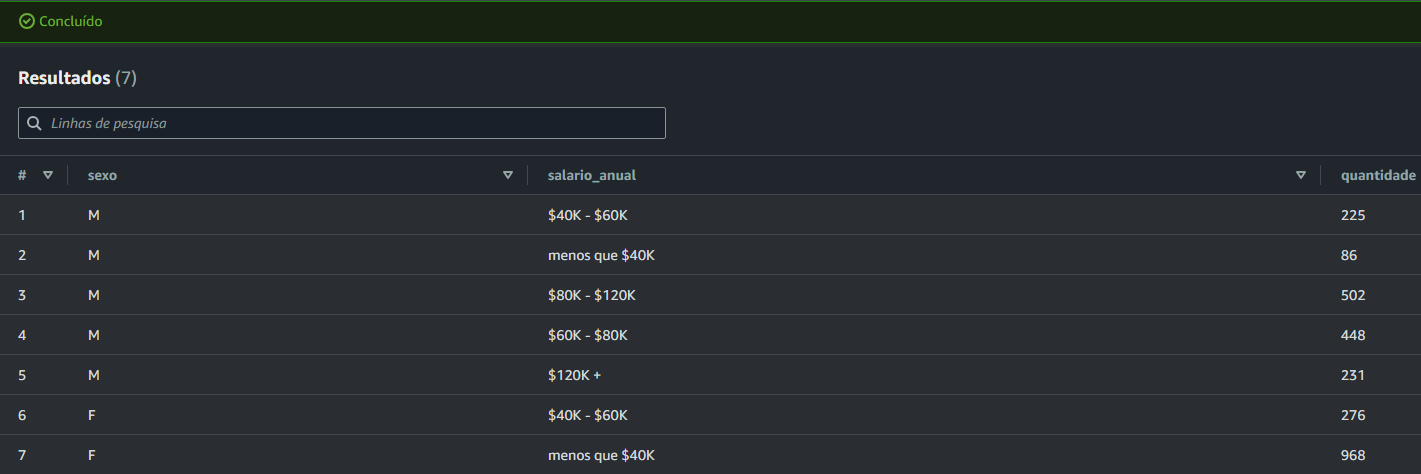

Visualização em Gráfico:

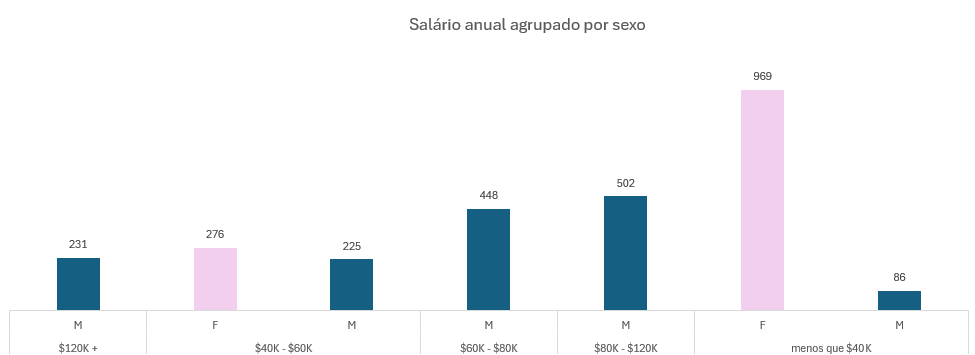



2° Qual a média de transações por estado civil?

Query:
```sql
SELECT estado_civil, AVG(valor_transacoes_12m) AS media_transacoes
FROM credito
WHERE estado_civil <> 'na'
GROUP BY estado_civil;
```

Resultado da Query:

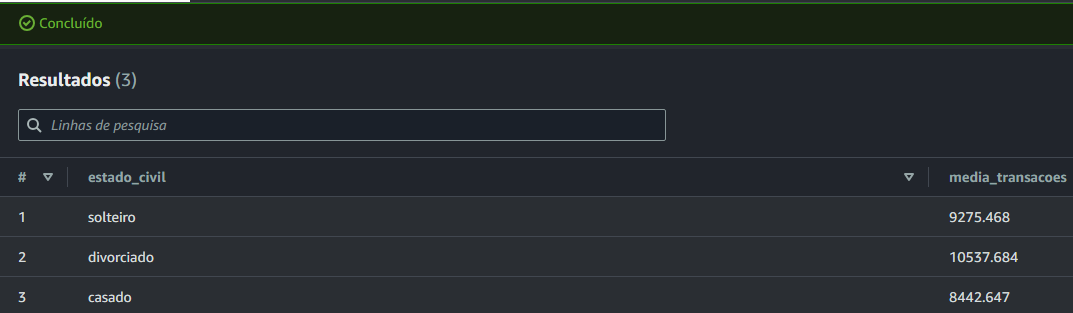

Visualização em Gráfico:

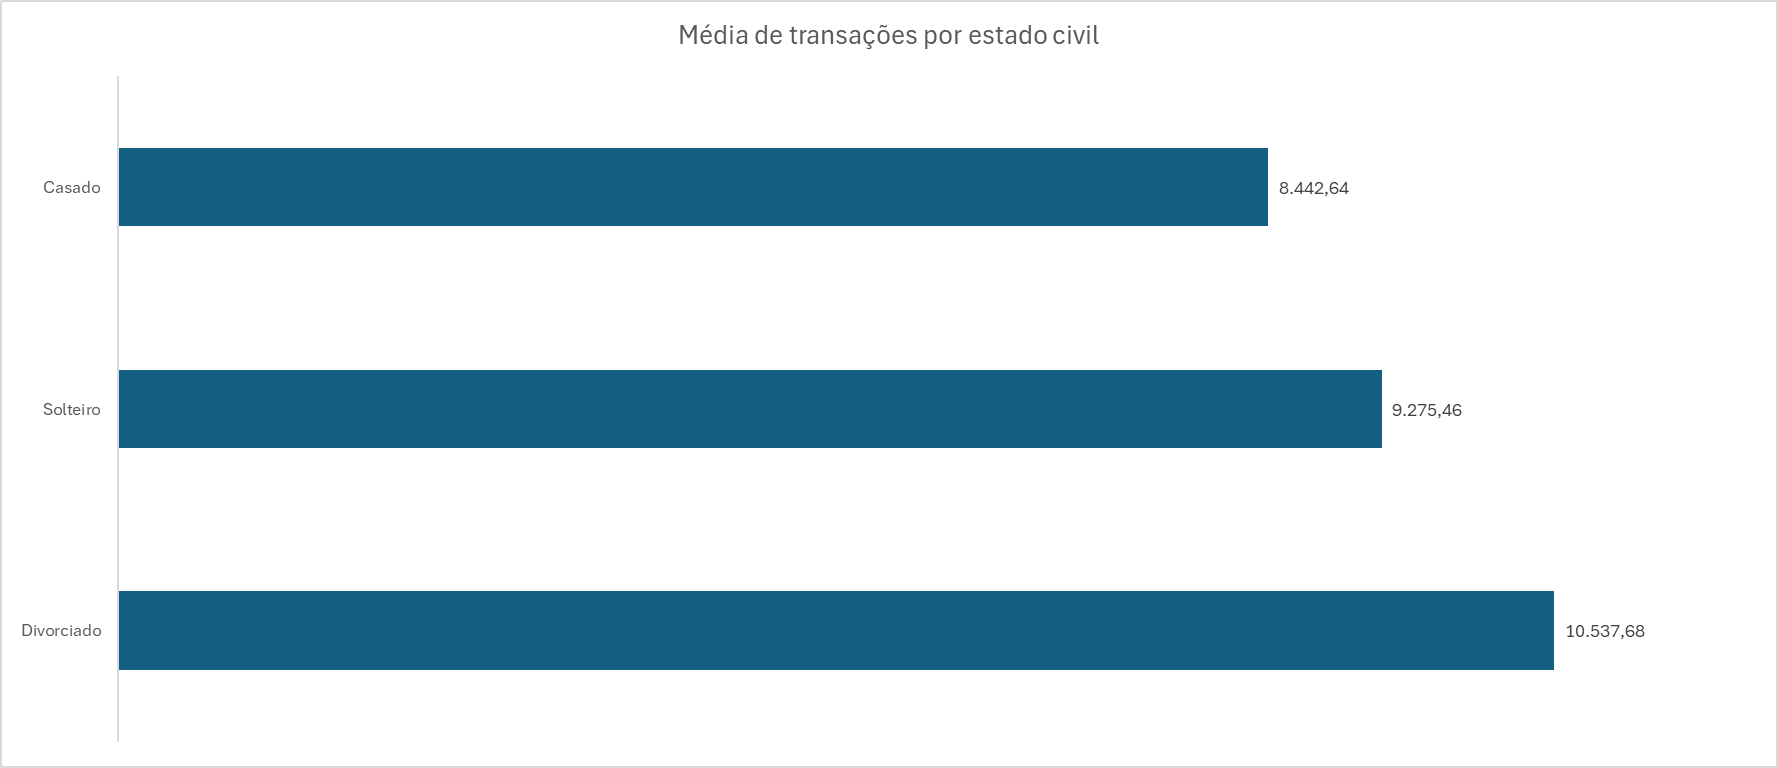

